4. Write a program to clip a polygon using Sutherland Hodgeman algorithm.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [28]:
def print_polygon_clipping(window, polygon, polygon_f, fig_size = (16, 6)):
    """ 
    Clip a polygon.
    Argument:
        polygon   (tuple or list)   : co-ordinate of polygon(shape(no_of_coordinate, 2))
        window    (tuple or list)   : co-ordinate of window.
        polygon_f (tuple or list)   : final co-ordinate of polygon after clipping.
        fig_size  (tuple or list)   : 
    Return:
        None
    """
    polygon = np.array(polygon)
    polygon = np.concatenate((polygon , polygon[0].reshape(1, -1)), axis=0)

    polygon_f = np.array(polygon_f)
    polygon_f = np.concatenate((polygon_f , polygon_f[0].reshape(1, -1)), axis=0)

    window = np.array(window)
    window = np.concatenate((window , window[0].reshape(1, -1)), axis=0)

    X_LIM_LOWER = min(np.concatenate((polygon[:, 0], window[:, 0]))) - 5
    X_LIM_UPPER = max(np.concatenate((polygon[:, 0], window[:, 0]))) + 5
    Y_LIM_LOWER = min(np.concatenate((polygon[:, 1], window[:, 1]))) - 5
    Y_LIM_UPPER = max(np.concatenate((polygon[:, 1], window[:, 1]))) + 5

    fig, ax =plt.subplots(1, 2, figsize=fig_size)
    for i in range(len(ax)):
        ax[i].set_xlim((X_LIM_LOWER, X_LIM_UPPER))
        ax[i].set_ylim((Y_LIM_LOWER, Y_LIM_UPPER))
        ax[i].plot(window[:, 0], window[:, 1], c='r')
        
    ax[0].set_title("Before clipping", fontsize=16)
    ax[1].set_title("After clipping", fontsize=16)
    
    ax[0].plot(polygon[:, 0], polygon[:, 1])
    ax[1].plot(polygon_f[:, 0], polygon_f[:, 1])
    

In [29]:
def compute_intersect_point(line_1, line_2):
    """ 
    Compute intersect point of two lines.
    Argument:
        line_1 (tuple)  : cordinates of line 1(x1, y1, x2, y2).
        line_2 (tuple)  : cordinates of line 1(x3, y3, x4, y4).
    Return:
        points (tuple)  : intersect coordinate(x, y).
        
    """
    x1, y1, x2, y2 = line_1
    x3, y3, x4, y4 = line_2
    d1_x = ((x4 - x3) * (x1 * y2 - x2 * y1) - (x2 - x1) * (x3 * y4 - x4 * y3))
    d2_x = (y2 - y1) * (x4 - x3) - (y4 - y3) * (x2 - x1)

    x = d1_x / d2_x
    
    d1_y = (x1 * y2 - x2 * y1) * (y3 - y4) - (y1 - y2) * (x3 * y4 - x4 * y3)
    d2_y = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)

    y = d1_y / d2_y

    points = (x, y)
    return points

In [41]:
def polygon_clipping(polygon, window):
    """ 
    Clip a polygon.
    Argument:
        polygon (tuple or list)   : co-ordinate of polygon(shape(no_of_coordinate, 2))
        window  (tuple or list)   : co-ordinate of window.
    Return:
        polygon (list)            : final co-ordinate of polygon(shape(no_of_coordinate, 2))
    """
    m = len(window)
    polygon_org = copy.deepcopy(polygon)
    polygon_f = []

    for i in range(m):
        x1_w, y1_w = window[i]
        x2_w, y2_w = window[(i+1)%m]
        n = len(polygon)
        for j in range(n):
            x1, y1 = polygon[j]
            x2, y2 = polygon[(j+1)%n]

            p1 = (x1 - x1_w) * (y2_w - y1_w) - (y1 - y1_w) * (x2_w - x1_w)
            p2 = (x2 - x1_w) * (y2_w - y1_w) - (y2 - y1_w) * (x2_w - x1_w)
            
            if p1 <= 0 and p2 <= 0:
                polygon_f.append([x2, y2])
            elif p1 <= 0 and p2 > 0:
                x, y = compute_intersect_point((x1_w, y1_w, x2_w, y2_w), (x1, y1, x2, y2))
                polygon_f.append([x, y])
            elif p1 > 0 and p2 <= 0:
                x, y = compute_intersect_point((x1_w, y1_w, x2_w, y2_w), (x1, y1, x2, y2))
                polygon_f.append([x, y])
                polygon_f.append([x2, y2])
            else:
                pass
            

        polygon = copy.deepcopy(polygon_f)
        polygon_f = []

    print_polygon_clipping(window, polygon_org, polygon)
    return polygon
    

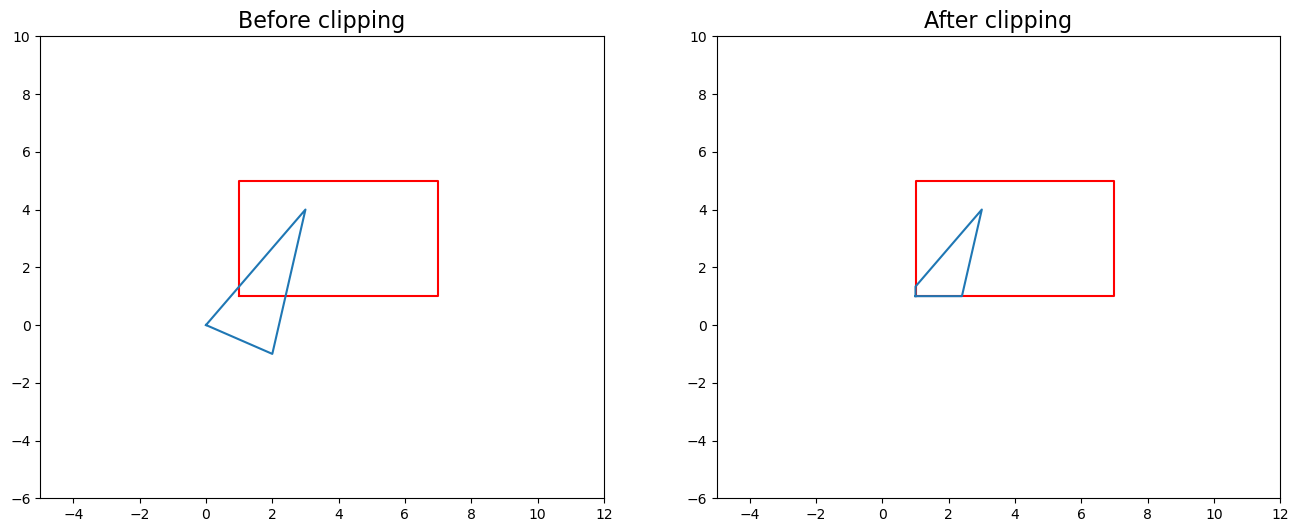

In [46]:
window_1 = ((1, 1), (7, 1), (7, 5), (1, 5))
polygon_1 = ((0, 0), (2, -1), (3, 4))

co_ordinate_1 = polygon_clipping(polygon_1, window_1)

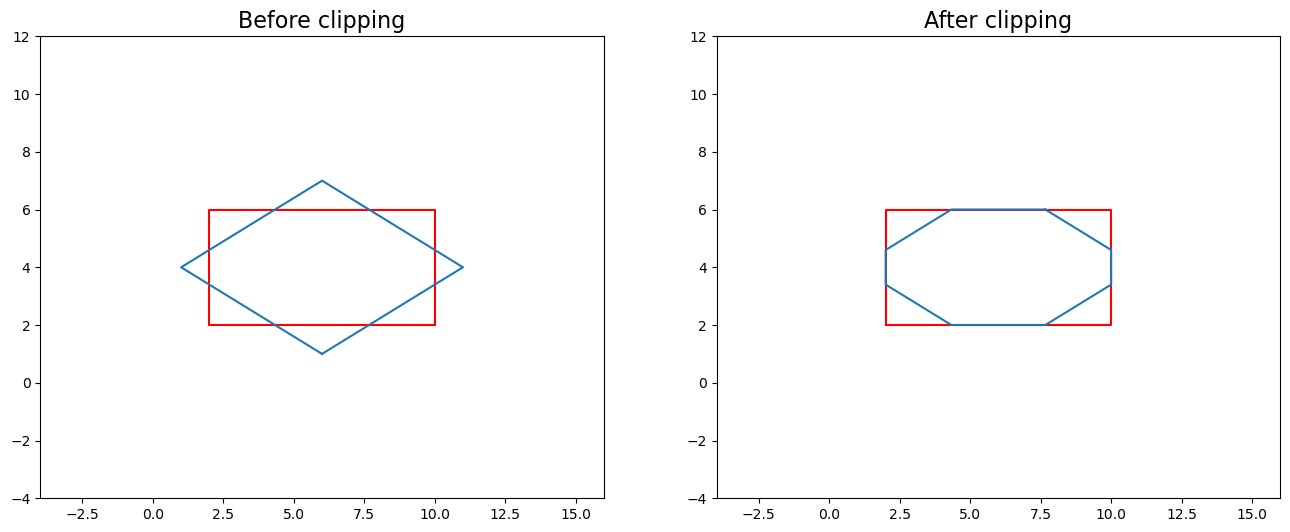

In [45]:
window_2 = ((2, 2), (10, 2), (10, 6), (2, 6))
polygon_2 = ((6, 1), (11, 4), (6, 7), (1, 4))

co_ordinate_2 = polygon_clipping(polygon_2, window_2)

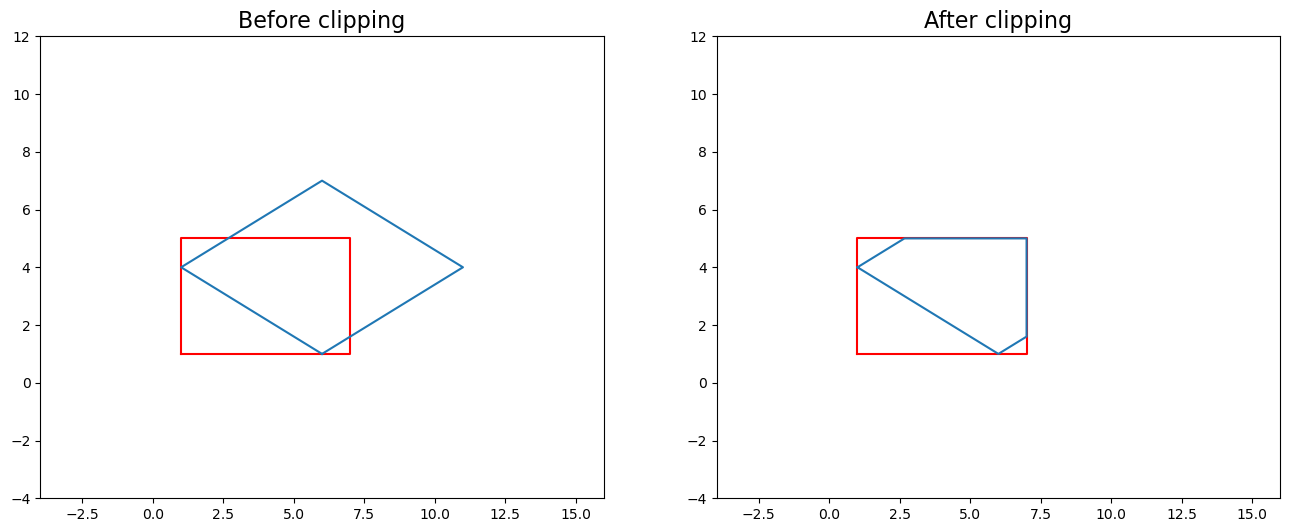

In [47]:
window_1 = ((1, 1), (7, 1), (7, 5), (1, 5))
polygon_2 = ((6, 1), (11, 4), (6, 7), (1, 4))

co_ordinate_3 = polygon_clipping(polygon_2, window_1)